# Healthcare Diagnosis Prediction

## About the Data

This healthcare dataset consists of patient admission records, including demographic information, medical conditions, hospital details, insurance data, medications, and test results. The dataset can be used for medical analysis and predictive modeling in healthcare applications.

#### Each record includes features such as:
- Patient's Age, Gender, and Blood Type
- Medical Condition on admission
- Admission and discharge details
- Hospital, Doctor, and Insurance Provider information
- Billing Amount and Room Number
- Medication prescribed and Test Results

---

##  Objective
The goal is to build a predictive machine learning model that can diagnose medical conditions based on patient data.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [5]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


## Data Preprocessing

### 1. Remove **Unuseful** Features (Personal columns)

In [6]:
data = df.copy()

In [7]:
data.drop(columns=['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Discharge Date','Room Number'], inplace=True)

### 2. Check **Duplicates**

In [8]:
data.duplicated().sum()

0

### 3. Check **Missing Values**

In [9]:
data.isna().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Billing Amount       0
Admission Type       0
Medication           0
Test Results         0
dtype: int64

### Check **Outliers**

Text(0.5, 1.0, 'Range of Age')

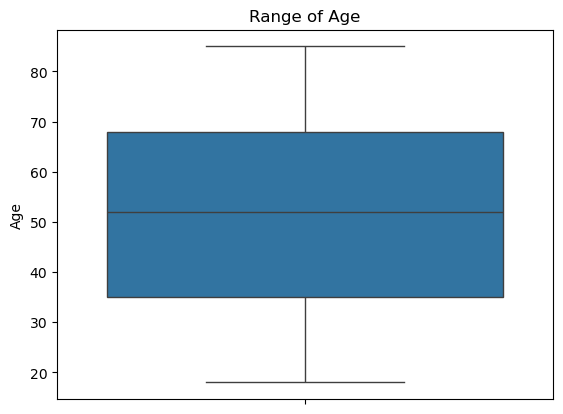

In [10]:
sns.boxplot(data=data, y='Age')
plt.title("Range of Age")

Text(0.5, 1.0, 'Range of Billing Amount')

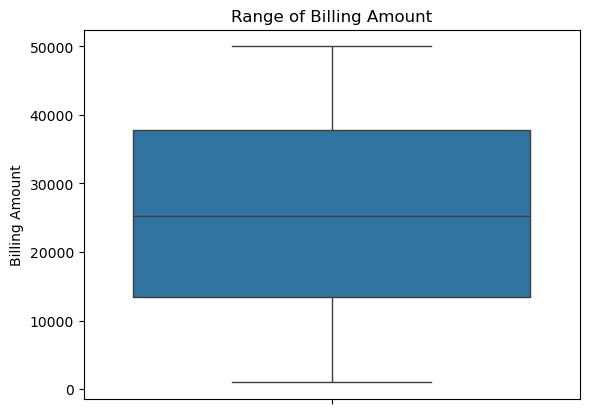

In [11]:
sns.boxplot(data=data, y='Billing Amount')
plt.title("Range of Billing Amount")

#### These figures show that There is **no Outliers**

## Exploratory Data Analysis (EDA)

In [12]:
# manually adding annotations to each bar
def annotate_bars(ax):
    for p in ax.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, str(count), ha='center', va='bottom')

### Age Distribution

Text(0.5, 1.0, 'Age Distribution')

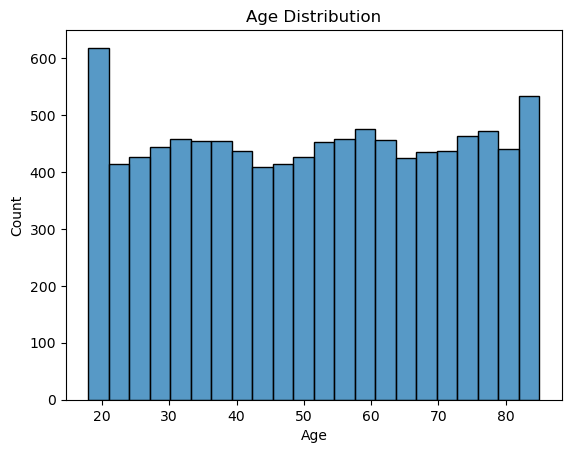

In [13]:
sns.histplot(data=df, x='Age')
plt.title('Age Distribution')

### Distribution of Medical Conditions

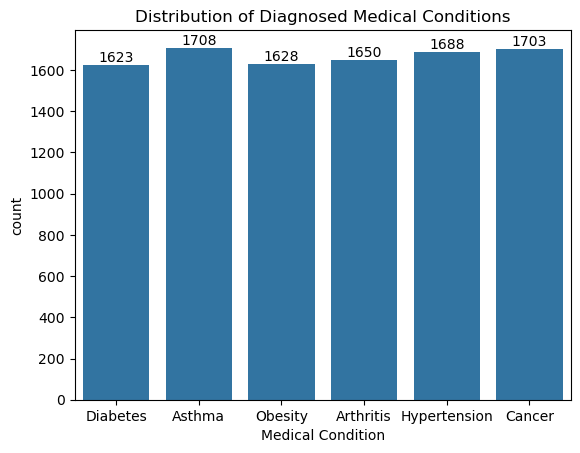

In [14]:
ax = sns.countplot(data=df, x='Medical Condition')
plt.title('Distribution of Diagnosed Medical Conditions')
annotate_bars(ax)

### Gender Distribution

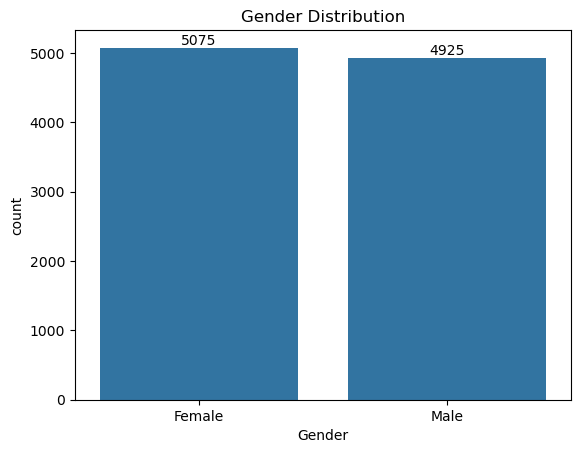

In [15]:
ax = sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
annotate_bars(ax)

### Blood Type Distribution

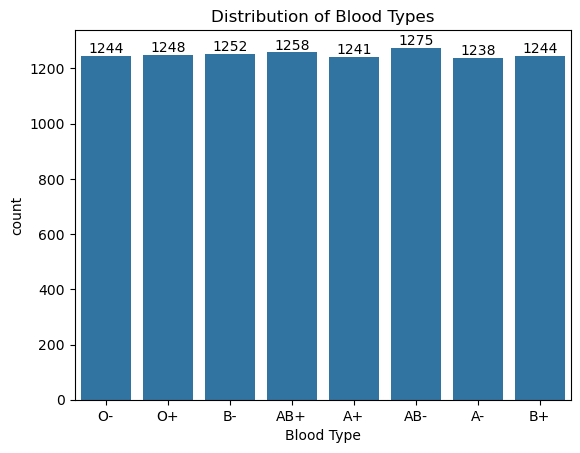

In [16]:
ax = sns.countplot(data=df, x='Blood Type')
plt.title('Distribution of Blood Types')
annotate_bars(ax)

### Admission Type Distribution

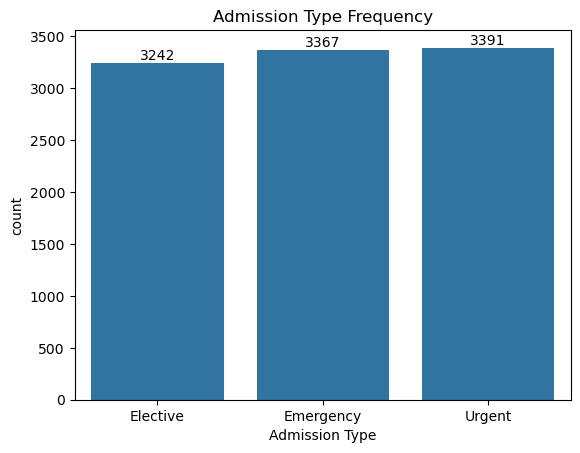

In [17]:
ax = sns.countplot(data=df, x='Admission Type')
plt.title('Admission Type Frequency')
annotate_bars(ax)

### Insurance Provider Distribution

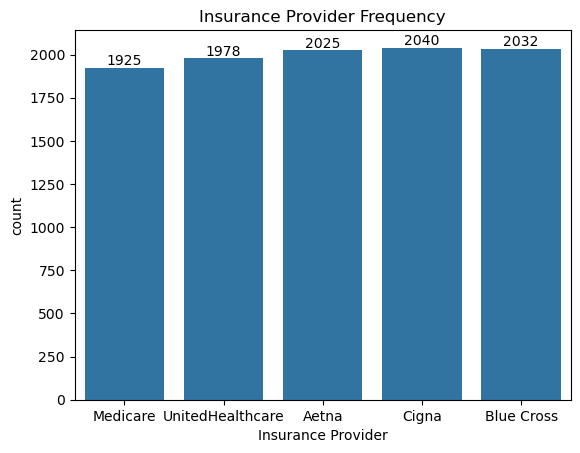

In [18]:
ax = sns.countplot(data=df, x='Insurance Provider')
plt.title('Insurance Provider Frequency')
annotate_bars(ax)

### Medication vs. Condition

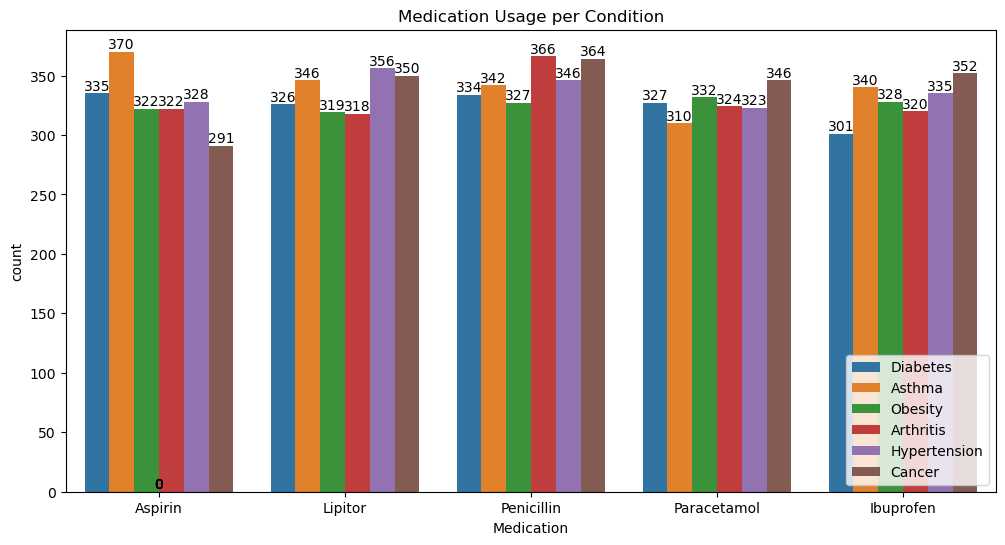

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Medication', hue='Medical Condition')
plt.title('Medication Usage per Condition')
plt.legend()
annotate_bars(ax)

### Billing Amount by Medical Condition

Text(0.5, 1.0, 'Billing Amount Distribution by Condition')

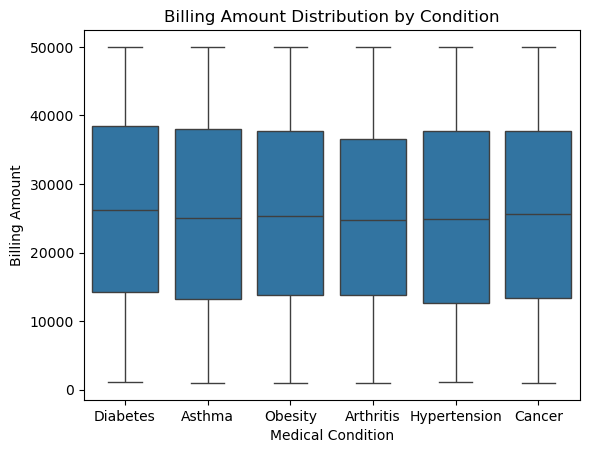

In [20]:
sns.boxplot(data=df, x='Medical Condition', y='Billing Amount')
plt.title('Billing Amount Distribution by Condition')

### Age by Medical Condition

Text(0.5, 1.0, 'Age Distribution by Condition')

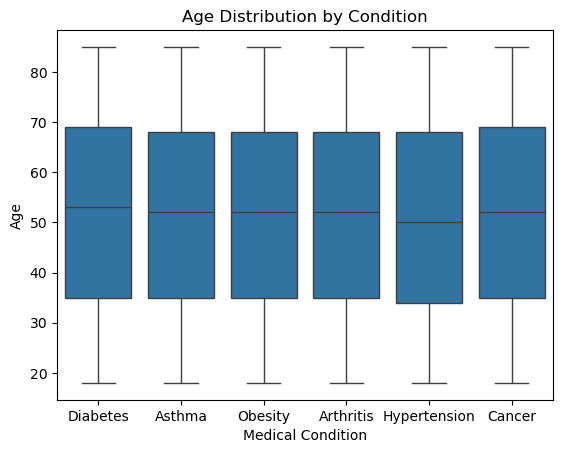

In [21]:
sns.boxplot(data=df, x='Medical Condition', y='Age')
plt.title('Age Distribution by Condition')

### Test Results by Condition

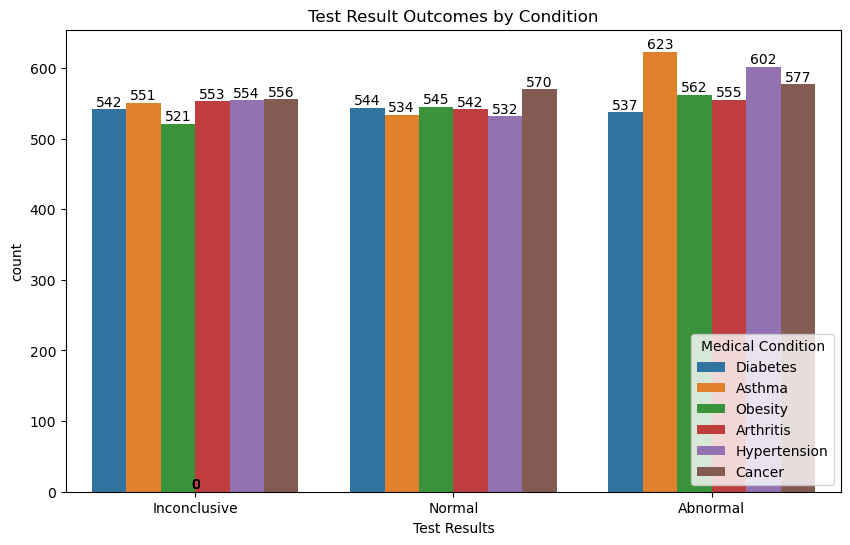

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Test Results', hue='Medical Condition')
plt.title('Test Result Outcomes by Condition')
annotate_bars(ax)

### Gender vs Medical Condition

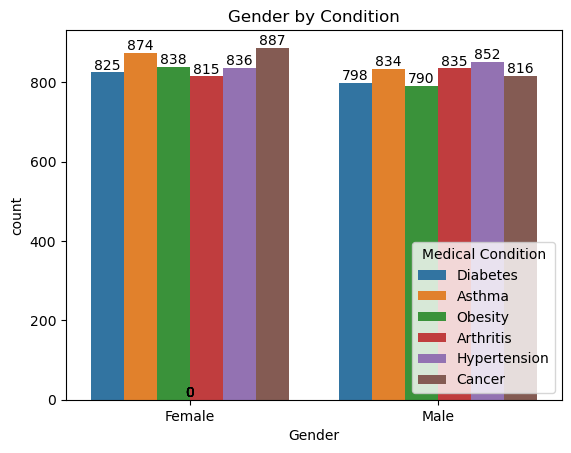

In [23]:
ax = sns.countplot(data=df, x='Gender', hue='Medical Condition')
plt.title('Gender by Condition')
annotate_bars(ax)

### All figures show that there:
#### The dataset appears to be well-balanced across all features **Balanced Dataset** (No dominant patterns)

## Feature Engineering

In [24]:
categorical_columns = data.select_dtypes('object').columns

In [25]:
for col in categorical_columns:
    print(data[col].value_counts())
    print('-'*30)

Gender
Female    5075
Male      4925
Name: count, dtype: int64
------------------------------
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64
------------------------------
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
------------------------------
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
------------------------------
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64
------------------------------
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64
------------------------------


### Encoding

In [26]:
df1 = data.copy()

#### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
LE = LabelEncoder()

data['Medical Condition'] = LE.fit_transform(data['Medical Condition'])

In [29]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

#### One-hot Encoding

In [30]:
data = pd.get_dummies(data, columns=[
    'Blood Type','Admission Type','Medication','Test Results'
])

In [31]:
data.head()

,Age,Gender,Medical Condition,Billing Amount,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,81,0,3,37490.983364,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,35,1,1,47304.064845,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,61,1,5,36874.896997,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
3,49,1,1,23303.322092,False,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
4,51,1,0,18086.344184,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


### Data Splitting

In [32]:
X = data.drop(columns=['Medical Condition'])
y = data['Medical Condition']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 22), (8000,), (2000, 22), (2000,))

### Data Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

#### Variance Methode

In [37]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
# Remove features with variance below a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selected_columns_train = selector.fit_transform(X_train_scaled)
selected_columns_test = selector.transform(X_test_scaled)

In [39]:
selected_columns_train.shape, selected_columns_test.shape  # not remove any feature

((8000, 22), (2000, 22))

In [40]:
# # Get the column names that were kept
# selected_columns_train = X_train.columns[selector.get_support()]
# selected_columns_test = X_test.columns[selector.get_support()]

# # Create a new DataFrame with selected columns
# X_train_selected = X_train[selected_columns_train]
# X_test_selected = X_test[selected_columns_test]

#### Lasso (L1-Regularized) Logistic Regression
Automatically shrinks **less important** feature coefficients to **zero**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [42]:
# Train L1-regularized logistic regression
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

In [43]:
# Feature selector
selector = SelectFromModel(model, prefit=True)

# Get mask of selected features
selected_mask = selector.get_support()
selected_mask  # not remove any feature

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

#### Will not Remove any Feature

In [44]:
# # Get selected feature names
# selected_features_train = X_train_selected.columns[selected_mask]
# selected_features_test = X_test_selected.columns[selected_mask]

# # Create new DataFrame with only selected features
# X_train_selected = X_train_selected[selected_features_train]
# X_test_selected = X_test_selected[selected_features_test]
# X_train_selected.shape, X_test_selected.shape

#### Univariate Feature Selection (SelectKBest)
Select features that have the **strongest relationship** with the target using statistical tests.

In [45]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Select top K best features
# selector = SelectKBest(score_func=f_classif, k=10)
# X_selected = selector.fit_transform(X, y)

# # Get selected column names
# selected_features = X.columns[selector.get_support()]
# print("Selected Features:", list(selected_features))

# # Update X to only selected features
# X = X[selected_features]

### Dimensionality Reduction.

In [46]:
X_train_scaled.shape, X_test_scaled.shape

((8000, 22), (2000, 22))

#### PCA Methode

In [47]:
from sklearn.decomposition import PCA

In [48]:
# Apply PCA (fit 95% from Variances)
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [49]:
X_train_pca.shape, X_test_pca.shape

((8000, 17), (2000, 17))

#### LDA Methode

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
data['Medical Condition'].nunique()

6

In [52]:
# Apply LDA (n_components = min(n_classes - 1, n_features))
lda = LinearDiscriminantAnalysis(n_components=5)  # min(6-1, 22)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [53]:
X_train_lda.shape, X_test_lda.shape

((8000, 5), (2000, 5))

In [ ]:
skip

## Modelling (Logistic Regression)

### Training

In [54]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()
model.fit(X_train_lda, y_train)

LogisticRegression()

### Evaluation

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [76]:
y_pred = model.predict(X_test_lda)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([4, 2, 5, 3, 5]))

In [77]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.16      0.16       330
           1       0.17      0.20      0.18       342
           2       0.17      0.23      0.20       340
           3       0.16      0.09      0.11       325
           4       0.17      0.19      0.18       338
           5       0.14      0.11      0.12       325

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.16      0.16      0.16      2000



In [59]:
skip

NameError: name 'skip' is not defined

## Modelling (Random Forest)

### Training

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [121]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([1, 2, 5, 0, 1]))

In [122]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.17

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17       330
           1       0.18      0.18      0.18       342
           2       0.16      0.16      0.16       340
           3       0.15      0.17      0.16       325
           4       0.20      0.21      0.21       338
           5       0.16      0.14      0.15       325

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [ ]:
skip

## Modelling (SVM)

### Training

In [99]:
from sklearn.svm import SVC

In [105]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC(probability=True)

### Evaluation

In [106]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([1, 3, 3, 1, 1]))

In [107]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.17

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.20      0.19       330
           1       0.17      0.17      0.17       342
           2       0.17      0.21      0.19       340
           3       0.17      0.16      0.17       325
           4       0.15      0.15      0.15       338
           5       0.17      0.13      0.15       325

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [ ]:
skip

## Modelling (KNN)

### Training

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Evaluation

In [127]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([4, 1, 3, 0, 0]))

In [128]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.17

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.28      0.21       330
           1       0.19      0.21      0.20       342
           2       0.16      0.15      0.16       340
           3       0.18      0.16      0.17       325
           4       0.16      0.13      0.14       338
           5       0.15      0.09      0.11       325

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



In [ ]:
skip

## Modelling (Gradient Boosting)

### Training

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluation

In [131]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([5, 1, 3, 3, 1]))

In [132]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.16      0.15       330
           1       0.19      0.20      0.20       342
           2       0.18      0.22      0.20       340
           3       0.17      0.13      0.14       325
           4       0.13      0.13      0.13       338
           5       0.16      0.12      0.14       325

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.16      0.16      0.16      2000



In [ ]:
skip

## Modelling (Naive Bayse)

### Training

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

### Evaluation

In [137]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([2, 2, 3, 4, 1]))

In [138]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.19      0.17       330
           1       0.15      0.14      0.15       342
           2       0.18      0.19      0.19       340
           3       0.13      0.08      0.10       325
           4       0.16      0.14      0.15       338
           5       0.16      0.20      0.17       325

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.15      2000
weighted avg       0.16      0.16      0.15      2000



In [ ]:
skip

## Modelling (XGBoost)

### Training

In [139]:
from xgboost import XGBClassifier

In [141]:
model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluation

In [142]:
y_pred = model.predict(X_test_scaled)
y_test.head(), y_pred[:5]

(4504    2
 5919    2
 6534    0
 6861    0
 1518    2
 Name: Medical Condition, dtype: int32,
 array([0, 1, 5, 3, 1], dtype=int64))

In [143]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.16      0.16       330
           1       0.15      0.16      0.15       342
           2       0.15      0.16      0.16       340
           3       0.17      0.16      0.16       325
           4       0.15      0.16      0.16       338
           5       0.17      0.15      0.16       325

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.16      0.16      0.16      2000



In [ ]:
skip

## test

In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df2 = df1.copy()

# for col in df2.select_dtypes('object').columns:
#     df2[col] = LE.fit_transform(df2[col])

df2['Medical Condition'] = LE.fit_transform(df2['Medical Condition'])
df2['Gender'] = df2['Gender'].map({'Male': 1, 'Female': 0})
df2 = pd.get_dummies(df2, columns=[
    'Blood Type','Admission Type','Medication','Test Results'
])
    
X1 = df2.drop(columns='Medical Condition')
y1 = df2['Medical Condition']

# Split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = SVC()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.16      0.19      0.18       312
           1       0.14      0.12      0.13       342
           2       0.15      0.17      0.16       339
           3       0.18      0.17      0.18       332
           4       0.15      0.14      0.14       338
           5       0.18      0.17      0.18       337

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.16      2000
weighted avg       0.16      0.16      0.16      2000



In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Work on a copy
df = df1.copy()

# Encode target
le_target = LabelEncoder()
df['Medical Condition'] = le_target.fit_transform(df['Medical Condition'])  # Target: y

# Gender binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# One-hot encode selected columns
df = pd.get_dummies(df, columns=[
    'Blood Type', 'Admission Type', 'Medication', 'Test Results'
])

# Shuffle just in case
df = shuffle(df, random_state=42)

# Define features and labels
X = df.drop(columns='Medical Condition')
y = df['Medical Condition']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with Random Forest (better for categorical)
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.18      0.18      0.18       330
      Asthma       0.16      0.16      0.16       342
      Cancer       0.17      0.18      0.17       340
    Diabetes       0.16      0.17      0.17       325
Hypertension       0.17      0.17      0.17       338
     Obesity       0.19      0.16      0.17       325

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000

